In [1]:
# pip install pmdarima
# best 2 0 2 

In [2]:
from google.colab import drive
drive.mount ('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [102]:
import pandas as pd

import numpy as np 
import regex as re

import matplotlib.pyplot as plt
# import matplotlib.artist as art
% matplotlib inline
import matplotlib.lines as lines
import seaborn as sns

# # Import LazyPredict libraries
# import lazypredict
# from lazypredict.Supervised import LazyClassifier

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import OneHotEncoder

# from sklearn.pipeline import make_pipeline
from xgboost import XGBRFRegressor
from xgboost import plot_importance
from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_absolute_error
from sklearn.model_selection import validation_curve


from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge



from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import TimeSeriesSplit

from sklearn import metrics

from sklearn.metrics import accuracy_score

from numpy import mean
from numpy import std
from scipy.stats import sem


from sklearn import set_config



# from datetime import datetime



In [4]:
# import warnings
# warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('/content/gdrive/Shareddrives/DATA_606_Capstone/Merged_data/df_institutional_data_allyrs.csv', parse_dates=['YEAR'])
# https://towardsdatascience.com/4-tricks-you-should-know-to-parse-date-columns-with-pandas-read-csv-27355bb2ad0e#:~:text=By%20default%2C%20the%20argument%20parse_dates,%2C%20or%20DD%2DMM).

In [6]:
df['YEAR'] = df['YEAR'].dt.year

In [7]:
df.shape

(34559, 53)

In [8]:
df.head()

,YEAR,UNITID,STABBR,INSTNM,OBEREG,HDEGOFFR,GROFFER,HBCU,LOCALE,INSTCAT,...,ADMCON3,ADMCON4,ADMCON5,ADMCON6,ADMCON7,ADMCON8,ADMCON9,SATNUM,ACTNUM,EFYTOTLT
0,2015,100654,AL,Alabama A & M University,5,12,1,1,12,2,...,1,2,3,2,1,1,3,136,1375,4549
1,2015,100663,AL,University of Alabama at Birmingham,5,11,1,2,12,2,...,1,1,3,3,1,3,3,106,1497,13465
2,2015,100690,AL,Amridge University,5,12,1,2,12,2,...,0,0,0,0,0,0,0,0,0,401
3,2015,100706,AL,University of Alabama in Huntsville,5,11,1,2,12,2,...,1,1,3,2,1,1,3,183,975,6540
4,2015,100724,AL,Alabama State University,5,11,1,1,12,2,...,2,3,3,3,1,1,3,212,894,5456


In [9]:
df['TUITVARY'].value_counts()

 2    19302
 1    13452
-2     1805
Name: TUITVARY, dtype: int64

In [10]:
colc=['TUITVARY']

for i in colc:
  df[i] = df[i].astype(str)
  df[i] = df[i].map(lambda x: re.sub(r'-2', '2', x))
  df[i] = df[i].astype(int)

In [11]:
df['INSTSIZE'].value_counts()

# INSTSIZE	1	Under 1,000
# INSTSIZE	2	1,000 - 4,999
# INSTSIZE	3	5,000 - 9,999
# INSTSIZE	4	10,000 - 19,999
# INSTSIZE	5	20,000 and above
# INSTSIZE	-1	Not reported
# INSTSIZE	-2	Not applicable

 2    12903
 1    12151
 3     4404
 4     3077
 5     2008
-1       13
-2        3
Name: INSTSIZE, dtype: int64

In [12]:
# Slice OUt  -2 and -1 

In [13]:
df=df.loc[lambda df:((df['INSTSIZE']!=-2)&(df['INSTSIZE']!=-1)),:]

### Removing CODE 9 = Outlying areas AS FM GU MH MP PR PW VI - (Not in the Continental USA) and CODE = 0 Service Schools 

In [14]:
df=df.loc[lambda df:((df['OBEREG']!=0)&(df['OBEREG']!=9)),:]

In [15]:
df=df.loc[lambda df:((df['ATHASSOC']!=-2)),:]

In [16]:
df.sort_values(by=['YEAR','UNITID','STABBR', 'INSTSIZE'], inplace=True)

### Before proceeding let us substitute CODE 11, 12, 13, and 14 with CODE 10 for the 'HDEGOFFR'= Code indicating the highest level of Degree offered by the Academic-Oriented HEI, since all of these codes as indicated above represent a doctorate level degree

In [17]:
colc=['HDEGOFFR']

for i in colc:
  df[i] = df[i].astype(str)
  df[i] = df[i].map(lambda x: re.sub(r'11', '10', x))
  df[i] = df[i].map(lambda x: re.sub(r'12', '10', x))
  df[i] = df[i].map(lambda x: re.sub(r'13', '10', x))
  df[i] = df[i].map(lambda x: re.sub(r'14', '10', x))
  df[i] = df[i].astype(int)

### Making sure all variables are read a categorical 

In [18]:
df['UNITID'] = df['UNITID'].astype(str)
df['OBEREG'] = df['OBEREG'].astype(str)
df['HDEGOFFR'] = df['HDEGOFFR'].astype(str)
df['GROFFER'] = df['GROFFER'].astype(str)
df['HBCU'] = df['HBCU'].astype(str)
df['LOCALE'] = df['LOCALE'].astype(str)
df['INSTCAT'] = df['INSTCAT'].astype(str)
df['INSTSIZE'] = df['INSTSIZE'].astype(str)
df['CNTLAFFI'] = df['CNTLAFFI'].astype(str)

df['OPENADMP'] = df['OPENADMP'].astype(str)
df['CREDITS1'] = df['CREDITS1'].astype(str)
df['CREDITS2'] = df['CREDITS2'].astype(str)
df['CREDITS3'] = df['CREDITS3'].astype(str)
df['CREDITS4'] = df['CREDITS4'].astype(str)
df['SLO5'] = df['SLO5'].astype(str)
df['SLO6'] = df['SLO6'].astype(str)
df['SLO7'] = df['SLO7'].astype(str)
df['SLO83'] = df['SLO83'].astype(str)
df['STUSRV1'] = df['STUSRV1'].astype(str)
df['STUSRV2'] = df['STUSRV2'].astype(str)
df['STUSRV3'] = df['STUSRV3'].astype(str)
df['STUSRV4'] = df['STUSRV4'].astype(str)
df['STUSRV8'] = df['STUSRV8'].astype(str)
df['LIBRES1'] = df['LIBRES1'].astype(str)
df['ATHASSOC'] = df['ATHASSOC'].astype(str)
df['TUITVARY'] = df['TUITVARY'].astype(str)
df['ROOM'] = df['ROOM'].astype(str)
df['BOARD'] = df['BOARD'].astype(str)
df['TUITPL'] = df['TUITPL'].astype(str)
df['VET1'] = df['VET1'].astype(str)
df['VET2'] = df['VET2'].astype(str)
df['VET3'] = df['VET3'].astype(str)
df['VET4'] = df['VET4'].astype(str)

df['VET5'] = df['VET5'].astype(str)
df['DSTNUGC'] = df['DSTNUGC'].astype(str)
df['DSTNUGP'] = df['DSTNUGP'].astype(str)
df['ADMCON1'] = df['ADMCON1'].astype(str)

df['ADMCON2'] = df['ADMCON2'].astype(str)
df['ADMCON3'] = df['ADMCON3'].astype(str)
df['ADMCON4'] = df['ADMCON4'].astype(str)
df['ADMCON5'] = df['ADMCON5'].astype(str)
df['ADMCON6'] = df['ADMCON6'].astype(str)
df['ADMCON7'] = df['ADMCON7'].astype(str)
df['ADMCON8'] = df['ADMCON8'].astype(str)
df['ADMCON9'] = df['ADMCON9'].astype(str)


# NUMERICAL: YEAR, APPLFEEU, RMANDBRDAMT, SATNUM, ACTNUM,  EFYTOTLT 

In [19]:
# (34559, 53)
df.shape

(33713, 53)

### Removing the outliers based on Total Enrolment Numbers

In [20]:
# def remove_outlier(df_name, col_name):
#     q1 = df_name[col_name].quantile(0.25)
#     q3 = df_name[col_name].quantile(0.75)
#     iqr = q3-q1 #Interquartile range
#     fence_low  = q1-1.5*iqr
#     fence_high = q3+1.5*iqr
#     df_name = df_name.loc[(df_name[col_name] > fence_low) & (df_name[col_name] < fence_high),:]
#     df_name= df_name.copy(deep=False)
#     print(df_name.shape)
#     return df_name

# # remove_outlier(df, 'EFYTOTLT')
# # df=df_name.copy(deep=False)

# # df_NOA=df.loc[lambda df:(df['OPENADMP']!=1),:].copy(False)


In [21]:
# df=remove_outlier(df, 'EFYTOTLT')

In [22]:
df.shape

(33713, 53)

### Creating a proportions column for SAT and ACT reported numbers (Numbers of reported scores in proportion to total enrollment for each HEI)

In [23]:
# df['SAT_RATIOS']=round(df['SATNUM']/df['EFYTOTLT'],2)
# df['ACT_RATIOS']=round(df['ACTNUM']/df['EFYTOTLT'],2)
df['PROP_SATNUM']=round(((df['SATNUM']/df['EFYTOTLT'])*100), 2)
df['PROP_ACTNUM']=round(((df['ACTNUM']/df['EFYTOTLT'])*100), 2)

# df.tail()

### Creating a comparison column where the code indicates if the Proporion of ACT and SAT reported is:
- not present code = 0
- up to 10% code = 1
- between 10% and 20% code = 2
- between 20% and 30% code = 3 
- between 30% and 40% code = 4
- over 40%  code = 5 

In [24]:

sats = (df['PROP_SATNUM'].values)
acts= (df['PROP_ACTNUM'].values)

ratios_sat = []
ratios_act = []

for i in range (len(sats)):
  if 0< sats[i] <10:
    ratios_sat.append(1)
  elif 10<= sats[i] <20:
    ratios_sat.append(2)
  elif 20<= sats[i] <30:
    ratios_sat.append(3)
  elif 30<= sats[i] <40:
    ratios_sat.append(4)
  elif 40<= sats[i]:
    ratios_sat.append(5)
  elif sats[i]==0:
    ratios_sat.append(0)    
# 
for i in range (len(acts)):
  if 0< acts[i] <10:
    ratios_act.append(1)
  elif 10<= acts[i] <20:
    ratios_act.append(2)
  elif 20<= acts[i] <30:
    ratios_act.append(3)
  elif 30<= acts[i] <40:
    ratios_act.append(4)
  elif 40<= acts[i]:
    ratios_act.append(5)
  elif acts[i]==0:
    ratios_act.append(0)
df['SAT_ENROL'] = ratios_sat 
df['ACT_ENROL'] = ratios_act 
df.head()  

,YEAR,UNITID,STABBR,INSTNM,OBEREG,HDEGOFFR,GROFFER,HBCU,LOCALE,INSTCAT,...,ADMCON7,ADMCON8,ADMCON9,SATNUM,ACTNUM,EFYTOTLT,PROP_SATNUM,PROP_ACTNUM,SAT_ENROL,ACT_ENROL
4020,2012,100654,AL,Alabama A & M University,5,10,1,1,12,2,...,1,1,3,113,820,4582,2.47,17.90,1,2
4021,2012,100663,AL,University of Alabama at Birmingham,5,10,1,2,12,2,...,1,3,3,79,1500,12962,0.61,11.57,1,2
4022,2012,100690,AL,Amridge University,5,10,1,2,12,2,...,0,0,0,0,0,522,0.00,0.00,0,0
4023,2012,100706,AL,University of Alabama in Huntsville,5,10,1,2,12,2,...,1,1,3,120,581,6983,1.72,8.32,1,1
4024,2012,100724,AL,Alabama State University,5,10,1,1,12,2,...,1,1,3,203,972,5541,3.66,17.54,1,2


### Splitting the data  between High and Low enrollment allows us to try to apply a logistic regression to our data 

In [25]:
# , stats

vals = df['INSTSIZE'].values
sizes =[]

for  x in vals:
  if x=='3':
      # print(x)
    sizes.append(7499.5)
  elif x=='1':
    sizes.append(500.5)
  elif x=='2':
    sizes.append(2999.5)
  elif x=='4':
    sizes.append(14999.5)
  elif x=='5':
    sizes.append(28398)
  # print(sizes)
df['CLASS_MIDDLE'] = sizes

enrols = df['EFYTOTLT'].values


# print(enrols.size)
compares = (df['CLASS_MIDDLE'].values)

# TO CREATE TWO CLASSES FOR ENROLLMENT One HIGH ABOVE 85% The other LOW BELOW 85%
compares2 = (df['CLASS_MIDDLE'].values)*0.85

# # TO DIVIDE ENROLLMENT IN THREE CLASSES:
# compares2_low = (df['CLASS_MIDDLE'].values)*0.50
# compares2_middle = (df['CLASS_MIDDLE'].values)*0.85

ratios = []

# # CREATES A MULTICLASS ENROLMENT CATEGORY LOW = code 0, MIDDLE  code=1; HIGH code = 2 

# for i in range (len(enrols)):
#   if enrols[i] <= compares2_low[i]:
#     ratios.append(0)
#   elif enrols[i] > compares2_low[i]:
#     if enrols[i] < compares2_middle[i]:
#       ratios.append(1)
#     else:
#       ratios.append(2)

    

# df['HIGH_ENROL'] = ratios
# df.tail()  

for i in range (len(enrols)):
  if enrols[i] > compares2[i]:
    ratios.append(1)
  else:
    ratios.append(0)
df['HIGH_ENROL'] = ratios
df.tail()  

# df.drop(['EFYTOTLT','SIZES'], axis=1, inplace=True)
# # df_2020cl.drop(['SIZES'], axis=1, inplace=True)

# INSTSIZE	1	Under 1,000 = 501 USED: 500.5
# INSTSIZE	2	1,000 - 4,999 = 3000 USED: 2999.5
# INSTSIZE	3	5,000 - 9,999 = 7500 USED: 7499.5
# INSTSIZE	4	10,000 - 19,999 = 15000 USED: 14999.5
# INSTSIZE	5	20,000 and above USED:

,YEAR,UNITID,STABBR,INSTNM,OBEREG,HDEGOFFR,GROFFER,HBCU,LOCALE,INSTCAT,...,ADMCON9,SATNUM,ACTNUM,EFYTOTLT,PROP_SATNUM,PROP_ACTNUM,SAT_ENROL,ACT_ENROL,CLASS_MIDDLE,HIGH_ENROL
34554,2020,495925,CA,San Joaquin Valley College-Madera,8,40,2,2,13,1,...,0,0,0,182,0.0,0.0,0,0,500.5,0
34555,2020,495934,CA,San Joaquin Valley College-Delano,8,40,2,2,23,1,...,0,0,0,192,0.0,0.0,0,0,500.5,0
34556,2020,495952,CA,San Joaquin Valley College-Rancho Mirage,8,40,2,2,21,1,...,0,0,0,67,0.0,0.0,0,0,500.5,0
34557,2020,495961,CA,San Joaquin Valley College-Santa Maria,8,40,2,2,12,1,...,0,0,0,51,0.0,0.0,0,0,500.5,0
34558,2020,496186,CA,California Institute of Arts & Technology-Nati...,8,40,2,2,21,1,...,0,0,0,383,0.0,0.0,0,0,500.5,0


In [26]:
colc=['LOCALE']

for i in colc:
  df[i] = df[i].astype(str)
  df[i] = df[i].map(lambda x: re.sub(r'11', '10', x))
  df[i] = df[i].map(lambda x: re.sub(r'12', '10', x))
  df[i] = df[i].map(lambda x: re.sub(r'13', '10', x))
  df[i] = df[i].map(lambda x: re.sub(r'14', '10', x))
  df[i] = df[i].map(lambda x: re.sub(r'21', '20', x))
  df[i] = df[i].map(lambda x: re.sub(r'22', '20', x))
  df[i] = df[i].map(lambda x: re.sub(r'23', '20', x))
  df[i] = df[i].map(lambda x: re.sub(r'31', '30', x))
  df[i] = df[i].map(lambda x: re.sub(r'32', '30', x))
  df[i] = df[i].map(lambda x: re.sub(r'33', '30', x))
  df[i] = df[i].map(lambda x: re.sub(r'41', '40', x))
  df[i] = df[i].map(lambda x: re.sub(r'42', '40', x))
  df[i] = df[i].map(lambda x: re.sub(r'43', '40', x))
  df[i] = df[i].astype(str)

In [27]:
# df.drop(['SATNUM','ACTNUM', 'CLASS_MIDDLE', 'PROP_SATNUM','PROP_ACTNUM'],axis=1,inplace=True)
# df.drop(['EFYTOTLT','SATNUM','ACTNUM', 'CLASS_MIDDLE', 'PROP_SATNUM','PROP_ACTNUM'],axis=1,inplace=True)

# df.drop([ 'PROP_SATNUM','PROP_ACTNUM'],axis=1,inplace=True)

df['SAT_ENROL']=df['SAT_ENROL'].astype(str)
df['ACT_ENROL']=df['ACT_ENROL'].astype(str)
df['HIGH_ENROL']=df['HIGH_ENROL'].astype(str)


### Slicing out institutions with open admissions altogether from our DF 

In [28]:
df_1=df.loc[lambda df:(df['OPENADMP']!=1),:].copy(deep=False)
#  'OPENADMP' = Code indicating whether the HEI adopts an Open Enrollment Policy or not	
# 	 1 = Yes adopt open enrollment policy 
# 	 2 = No

In [29]:
df_1.head()

,YEAR,UNITID,STABBR,INSTNM,OBEREG,HDEGOFFR,GROFFER,HBCU,LOCALE,INSTCAT,...,ADMCON9,SATNUM,ACTNUM,EFYTOTLT,PROP_SATNUM,PROP_ACTNUM,SAT_ENROL,ACT_ENROL,CLASS_MIDDLE,HIGH_ENROL
4020,2012,100654,AL,Alabama A & M University,5,10,1,1,10,2,...,3,113,820,4582,2.47,17.90,1,2,2999.5,1
4021,2012,100663,AL,University of Alabama at Birmingham,5,10,1,2,10,2,...,3,79,1500,12962,0.61,11.57,1,2,14999.5,1
4022,2012,100690,AL,Amridge University,5,10,1,2,10,2,...,0,0,0,522,0.00,0.00,0,0,500.5,1
4023,2012,100706,AL,University of Alabama in Huntsville,5,10,1,2,10,2,...,3,120,581,6983,1.72,8.32,1,1,7499.5,1
4024,2012,100724,AL,Alabama State University,5,10,1,1,10,2,...,3,203,972,5541,3.66,17.54,1,2,7499.5,0


In [30]:
df_1['INSTSIZE'] = df_1['INSTSIZE'].astype(int)

In [31]:
# df_1.info()

# **Testing - Time Series Analysis on Numerical Features Only **

In [32]:
df_NUM = df_1[['YEAR','UNITID','INSTSIZE','APPLFEEU','RMANDBRDAMT','SATNUM', 'ACTNUM','EFYTOTLT']].copy(deep=False)
df_NUM.head()
# CREATING DF with ONLY Numerical Variables from our data 

,YEAR,UNITID,INSTSIZE,APPLFEEU,RMANDBRDAMT,SATNUM,ACTNUM,EFYTOTLT
4020,2012,100654,2,30,10119,113,820,4582
4021,2012,100663,4,30,9294,79,1500,12962
4022,2012,100690,1,50,0,0,0,522
4023,2012,100706,3,30,8070,120,581,6983
4024,2012,100724,3,25,4600,203,972,5541


In [33]:
# https://www.analyticsvidhya.com/blog/2018/09/multivariate-time-series-guide-forecasting-modeling-python-codes/
# https://www.machinelearningplus.com/time-series/time-series-analysis-python/
# https://towardsdatascience.com/advanced-time-series-analysis-in-python-decomposition-autocorrelation-115aa64f475e
# https://www.kaggle.com/code/kashnitsky/topic-9-part-1-time-series-analysis-in-python
# https://machinelearningmastery.com/feature-selection-time-series-forecasting-python/

# Time Series ARticles 

df_NUM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33713 entries, 4020 to 34558
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   YEAR         33713 non-null  int64 
 1   UNITID       33713 non-null  object
 2   INSTSIZE     33713 non-null  int64 
 3   APPLFEEU     33713 non-null  int64 
 4   RMANDBRDAMT  33713 non-null  int64 
 5   SATNUM       33713 non-null  int64 
 6   ACTNUM       33713 non-null  int64 
 7   EFYTOTLT     33713 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 2.3+ MB


In [34]:
df_NUM.columns

Index(['YEAR', 'UNITID', 'INSTSIZE', 'APPLFEEU', 'RMANDBRDAMT', 'SATNUM',
       'ACTNUM', 'EFYTOTLT'],
      dtype='object')

In [35]:
# df_NUM['INSTSIZE'].value_counts() # NO OPEN ENROLLMENT

# 2    12500
# 1    11805
# 3     4260
# 4     1518
# 5       94

In [36]:
# raw_data['Mycol'] =  pd.to_datetime(raw_data['Mycol'], format='%d%b%Y:%H:%M:%S.%f')
df_NUM['YEAR'] =  pd.to_datetime(df_NUM['YEAR'], format='%Y')
df_NUM

,YEAR,UNITID,INSTSIZE,APPLFEEU,RMANDBRDAMT,SATNUM,ACTNUM,EFYTOTLT
4020,2012-01-01,100654,2,30,10119,113,820,4582
4021,2012-01-01,100663,4,30,9294,79,1500,12962
4022,2012-01-01,100690,1,50,0,0,0,522
4023,2012-01-01,100706,3,30,8070,120,581,6983
4024,2012-01-01,100724,3,25,4600,203,972,5541
...,...,...,...,...,...,...,...,...
34554,2020-01-01,495925,1,0,0,0,0,182
34555,2020-01-01,495934,1,0,0,0,0,192
34556,2020-01-01,495952,1,0,0,0,0,67
34557,2020-01-01,495961,1,0,0,0,0,51


In [37]:
count_df=df_NUM.groupby(by=['YEAR','INSTSIZE'])['INSTSIZE'].count()
# type(count_df)
# count_df.index # Year , Instsize
count_df

YEAR        INSTSIZE
2012-01-01  1           1509
            2           1473
            3            495
            4            360
            5            226
2013-01-01  1           1557
            2           1451
            3            489
            4            352
            5            229
2014-01-01  1           1499
            2           1433
            3            487
            4            339
            5            230
2015-01-01  1           1473
            2           1399
            3            493
            4            327
            5            230
2016-01-01  1           1271
            2           1364
            3            504
            4            329
            5            223
2017-01-01  1           1270
            2           1349
            3            491
            4            336
            5            221
2018-01-01  1           1105
            2           1342
            3            477
            4         

In [38]:
students_count=df_NUM.groupby(by=['YEAR','INSTSIZE'])['EFYTOTLT'].sum()
# df_NUM.groupby(by=['YEAR','INSTSIZE']).count()
students_count


YEAR        INSTSIZE
2012-01-01  1            971134
            2           4507045
            3           4433568
            4           6064087
            5           7900914
2013-01-01  1            953889
            2           4410033
            3           4322521
            4           5824793
            5           7792031
2014-01-01  1            908211
            2           4382526
            3           4293467
            4           5578517
            5           7754104
2015-01-01  1            852008
            2           4238834
            3           4347734
            4           5429608
            5           7736689
2016-01-01  1            689372
            2           4064535
            3           4336997
            4           5525592
            5           7554274
2017-01-01  1            679507
            2           4008873
            3           4211539
            4           5555029
            5           7512086
2018-01-01  1      

In [39]:
# pd.concat([s3, s4, s5], axis=1, keys=["red", "blue", "yellow"])
df_New_NUM=pd.concat([count_df, students_count], axis=1, keys=['INST_NUM', 'EFYTOTLT'])
df_New_NUM

INST_NUM  EFYTOTLT
YEAR       INSTSIZE                    
2012-01-01 1             1509    971134
           2             1473   4507045
           3              495   4433568
           4              360   6064087
           5              226   7900914
2013-01-01 1             1557    953889
           2             1451   4410033
           3              489   4322521
           4              352   5824793
           5              229   7792031
2014-01-01 1             1499    908211
           2             1433   4382526
           3              487   4293467
           4              339   5578517
           5              230   7754104
2015-01-01 1             1473    852008
           2             1399   4238834
           3              493   4347734
           4              327   5429608
           5              230   7736689
2016-01-01 1             1271    689372
           2             1364   4064535
           3              504   4336997
           4              329   5525592
           5              223   7554274
2017-01-01 1             1270    679507
           2             1349   4008873
           3              491   4211539
           4              336   5555029
           5              221   7512086
2018-01-01 1             1105    573243
           2             1342   4007545
           3              477   4133230
           4              336   5448873
           5              222   7581728
2019-01-01 1             1054    543098
           2             1348   4009438
           3              469   4073471
           4              340   5555096
           5              216   7473462
2020-01-01 1             1067    553372
           2             1353   4163409
           3              459   4144163
           4              306   5069775
           5              210   7552360

In [40]:
df_New_NUM.reset_index(inplace=True)
df_New_NUM

,YEAR,INSTSIZE,INST_NUM,EFYTOTLT
0,2012-01-01,1,1509,971134
1,2012-01-01,2,1473,4507045
2,2012-01-01,3,495,4433568
3,2012-01-01,4,360,6064087
4,2012-01-01,5,226,7900914
5,2013-01-01,1,1557,953889
6,2013-01-01,2,1451,4410033
7,2013-01-01,3,489,4322521
8,2013-01-01,4,352,5824793
9,2013-01-01,5,229,7792031


In [41]:
df_by_year = df_1[['YEAR','INSTSIZE','EFYTOTLT']].copy(deep=False)
df_by_year

,YEAR,INSTSIZE,EFYTOTLT
4020,2012,2,4582
4021,2012,4,12962
4022,2012,1,522
4023,2012,3,6983
4024,2012,3,5541
...,...,...,...
34554,2020,1,182
34555,2020,1,192
34556,2020,1,67
34557,2020,1,51


In [42]:
df_by_year['YEAR'] =  pd.to_datetime(df_by_year['YEAR'], format='%Y')
df_by_year

,YEAR,INSTSIZE,EFYTOTLT
4020,2012-01-01,2,4582
4021,2012-01-01,4,12962
4022,2012-01-01,1,522
4023,2012-01-01,3,6983
4024,2012-01-01,3,5541
...,...,...,...
34554,2020-01-01,1,182
34555,2020-01-01,1,192
34556,2020-01-01,1,67
34557,2020-01-01,1,51


In [43]:
df_new_NUM=df_New_NUM.copy()
df_new_NUM.reset_index(inplace=True)
# df_new_NUM.reset_index()
# df_new_NUM.index
# df_new_NUM

# date_index2=['2012-01-01','2012-01-01','2012-01-01','2012-01-01','2012-01-01','2013-01-01','2013-01-01','2013-01-01','2013-01-01','2013-01-01',
#              '2014-01-01','2014-01-01','2014-01-01','2014-01-01','2014-01-01','2015-01-01','2015-01-01','2015-01-01','2015-01-01','2015-01-01',
#              '2016-01-01','2016-01-01','2016-01-01','2016-01-01','2016-01-01','2017-01-01','2017-01-01','2017-01-01','2017-01-01','2017-01-01',
#              '2018-01-01','2018-01-01','2018-01-01','2018-01-01','2018-01-01','2019-01-01','2019-01-01','2019-01-01','2019-01-01','2019-01-01',
#              '2020-01-01','2020-01-01','2020-01-01','2020-01-01','2020-01-01']
# df_new_NUM.reindex(date_index2)
df_new_NUM

,index,YEAR,INSTSIZE,INST_NUM,EFYTOTLT
0,0,2012-01-01,1,1509,971134
1,1,2012-01-01,2,1473,4507045
2,2,2012-01-01,3,495,4433568
3,3,2012-01-01,4,360,6064087
4,4,2012-01-01,5,226,7900914
5,5,2013-01-01,1,1557,953889
6,6,2013-01-01,2,1451,4410033
7,7,2013-01-01,3,489,4322521
8,8,2013-01-01,4,352,5824793
9,9,2013-01-01,5,229,7792031


In [44]:
df_New_NUM['EFYTOTLT_PROP']=round((df_New_NUM['EFYTOTLT']/df_New_NUM['INST_NUM'])*100, 2)
df_New_NUM.head()


,YEAR,INSTSIZE,INST_NUM,EFYTOTLT,EFYTOTLT_PROP
0,2012-01-01,1,1509,971134,64356.13
1,2012-01-01,2,1473,4507045,305977.26
2,2012-01-01,3,495,4433568,895670.30
3,2012-01-01,4,360,6064087,1684468.61
4,2012-01-01,5,226,7900914,3495979.65


In [45]:
data=df_New_NUM[['YEAR','INSTSIZE','EFYTOTLT_PROP']]
data.set_index('YEAR')

,INSTSIZE,EFYTOTLT_PROP
YEAR,,
2012-01-01,1,64356.13
2012-01-01,2,305977.26
2012-01-01,3,895670.30
2012-01-01,4,1684468.61
2012-01-01,5,3495979.65
2013-01-01,1,61264.55
2013-01-01,2,303930.60
2013-01-01,3,883951.12
2013-01-01,4,1654770.74


In [46]:
# df_New_NUM.info()

In [47]:
df_New_NUM.head()

,YEAR,INSTSIZE,INST_NUM,EFYTOTLT,EFYTOTLT_PROP
0,2012-01-01,1,1509,971134,64356.13
1,2012-01-01,2,1473,4507045,305977.26
2,2012-01-01,3,495,4433568,895670.30
3,2012-01-01,4,360,6064087,1684468.61
4,2012-01-01,5,226,7900914,3495979.65


In [48]:
df_by_year

,YEAR,INSTSIZE,EFYTOTLT
4020,2012-01-01,2,4582
4021,2012-01-01,4,12962
4022,2012-01-01,1,522
4023,2012-01-01,3,6983
4024,2012-01-01,3,5541
...,...,...,...
34554,2020-01-01,1,182
34555,2020-01-01,1,192
34556,2020-01-01,1,67
34557,2020-01-01,1,51


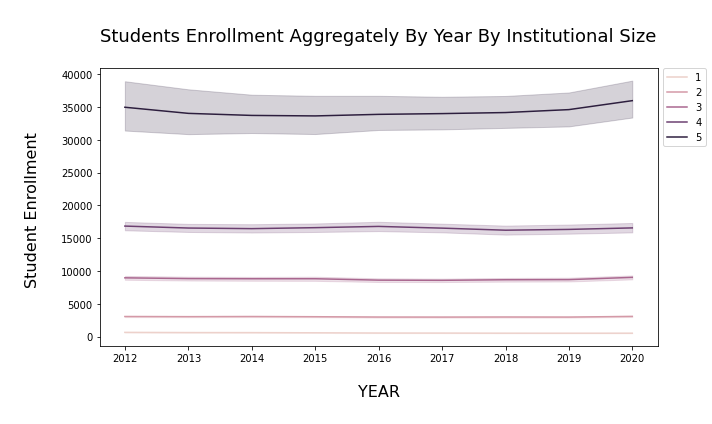

In [49]:
# df_by_year
data = df_by_year[['YEAR','INSTSIZE','EFYTOTLT',]]
sns.color_palette("rocket", as_cmap=True)
plt.figure(figsize=(10,6))
sns.lineplot(data=data, x="YEAR", y="EFYTOTLT", hue="INSTSIZE")
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)
plt.title("\nStudents Enrollment Aggregately By Year By Institutional Size\n", fontsize=18)
plt.xlabel("\nYEAR\n", fontsize=16)
plt.ylabel("\nStudent Enrollment \n", fontsize=16)
plt.tight_layout()

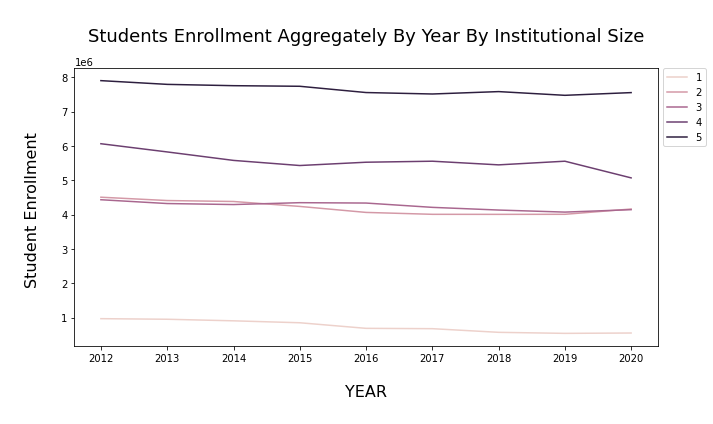

In [46]:
# data = df_New_NUM[['YEAR','INSTSIZE','EFYTOTLT',]]
# sns.color_palette("rocket", as_cmap=True)
# plt.figure(figsize=(10,6))
# sns.lineplot(data=data, x="YEAR", y="EFYTOTLT", hue="INSTSIZE")
# plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)
# plt.title("\nStudents Enrollment Aggregately By Year By Institutional Size\n", fontsize=18)
# plt.xlabel("\nYEAR\n", fontsize=16)
# plt.ylabel("\nStudent Enrollment \n", fontsize=16)
# plt.tight_layout()

In [47]:
# data = df_New_NUM[['YEAR','INSTSIZE','EFYTOTLT_PROP',]]
# sns.lineplot(data=data, x="YEAR", y="EFYTOTLT_PROP", hue="INSTSIZE")

### The numerical data pertaining to our HEIs appears to be fairly stationary - There is a reating patterm per year without significant changes (with some exceptions)  

In [48]:
# https://towardsdatascience.com/detecting-stationarity-in-time-series-data-d29e0a21e638

In [51]:
# df_by_year.set_index("YEAR", inplace=True)
data=df_by_year[['YEAR','INSTSIZE','EFYTOTLT']]
data.set_index('YEAR')

,INSTSIZE,EFYTOTLT
YEAR,,
2012-01-01,2,4582
2012-01-01,4,12962
2012-01-01,1,522
2012-01-01,3,6983
2012-01-01,3,5541
...,...,...
2020-01-01,1,182
2020-01-01,1,192
2020-01-01,1,67


In [52]:
# data=df_New_NUM[['YEAR','INSTSIZE','EFYTOTLT']]
# data.set_index('YEAR')

In [53]:
data_1=data.loc[lambda data:((data['INSTSIZE']==1)),:]
data_1.drop(['INSTSIZE'], axis=1, inplace=True)
data_1.set_index('YEAR')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,EFYTOTLT
YEAR,
2012-01-01,522
2012-01-01,849
2012-01-01,1127
2012-01-01,612
2012-01-01,82
...,...
2020-01-01,182
2020-01-01,192
2020-01-01,67


In [54]:
data_2=data.loc[lambda data:((data['INSTSIZE']==2)),:]
data_2.drop(['INSTSIZE'], axis=1, inplace=True)
data_2.set_index('YEAR')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,EFYTOTLT
YEAR,
2012-01-01,4582
2012-01-01,3239
2012-01-01,1354
2012-01-01,2500
2012-01-01,3731
...,...
2020-01-01,2523
2020-01-01,3893
2020-01-01,1034


In [55]:
data_3=data.loc[lambda data:((data['INSTSIZE']==3)),:]
data_3.drop(['INSTSIZE'], axis=1, inplace=True)
data_3.set_index('YEAR')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,EFYTOTLT
YEAR,
2012-01-01,6983
2012-01-01,5541
2012-01-01,5424
2012-01-01,9482
2012-01-01,7905
...,...
2020-01-01,11958
2020-01-01,14828
2020-01-01,9796


In [63]:
data_4=data.loc[lambda data:(data['INSTSIZE']==4),:]
data_4.drop(['INSTSIZE'], axis=1, inplace=True)
data_4.set_index('YEAR')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,EFYTOTLT
YEAR,
2012-01-01,12962
2012-01-01,17612
2012-01-01,13366
2012-01-01,26030
2012-01-01,19525
...,...
2020-01-01,16578
2020-01-01,12812
2020-01-01,22283


In [57]:
data_5=data.loc[lambda data:(data['INSTSIZE']==5),:]
data_5.drop(['INSTSIZE'], axis=1, inplace=True)
data_5.set_index('YEAR')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,EFYTOTLT
YEAR,
2012-01-01,28718
2012-01-01,21429
2012-01-01,25182
2012-01-01,65501
2012-01-01,33190
...,...
2020-01-01,109697
2020-01-01,39961
2020-01-01,58668


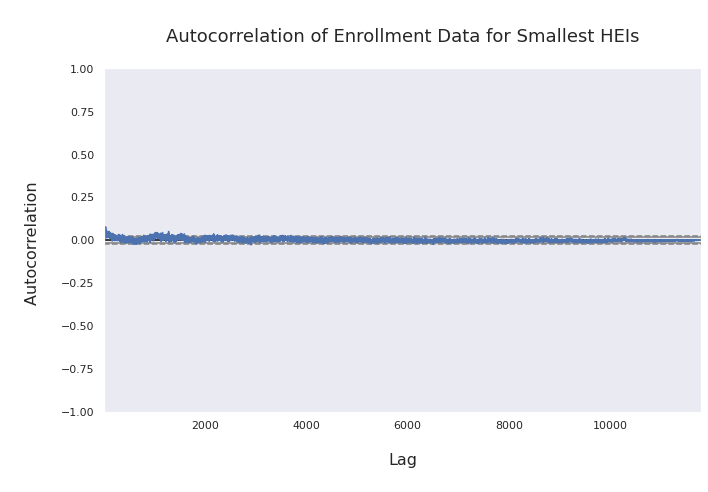

In [148]:

from pandas.plotting import autocorrelation_plot
 
plt.figure(figsize=(10,7))
series_data = pd.Series(data = data_1['EFYTOTLT'])
autocorrelation_plot(series_data)



# plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)
plt.title("\nAutocorrelation of Enrollment Data for Smallest HEIs\n", fontsize=18)
plt.xlabel("\nLag\n", fontsize=16)
plt.ylabel("\nAutocorrelation \n", fontsize=16)
plt.tight_layout()

plt.show()

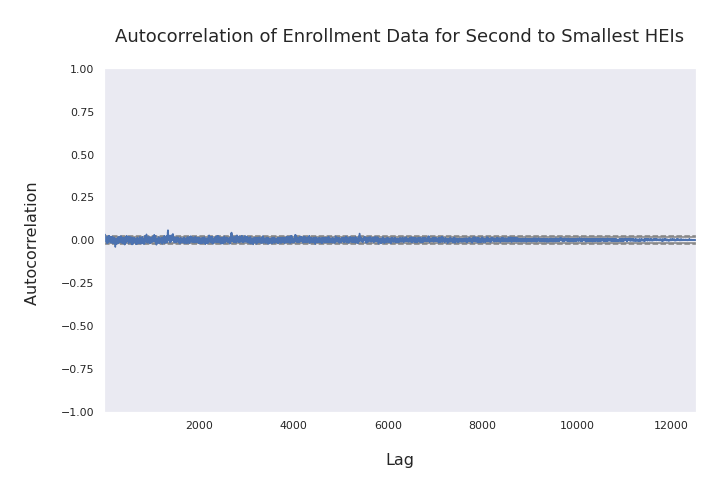

In [149]:

# from pandas.plotting import autocorrelation_plot
 
plt.figure(figsize=(10,7))
series_data = pd.Series(data = data_2['EFYTOTLT'])
autocorrelation_plot(series_data)


# plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)
plt.title("\nAutocorrelation of Enrollment Data for Second to Smallest HEIs\n", fontsize=18)
plt.xlabel("\nLag\n", fontsize=16)
plt.ylabel("\nAutocorrelation \n", fontsize=16)
plt.tight_layout()

plt.show()
# plt.show()

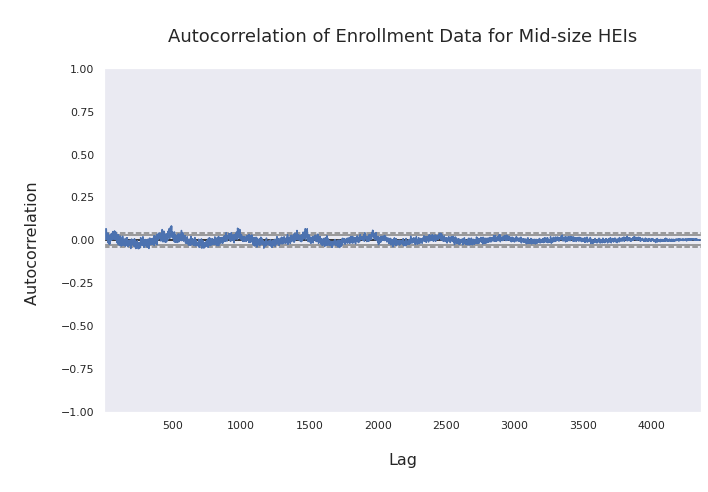

In [151]:

plt.figure(figsize=(10,7))
series_data = pd.Series(data = data_3['EFYTOTLT'])
autocorrelation_plot(series_data)
plt.title("\nAutocorrelation of Enrollment Data for Mid-size HEIs\n", fontsize=18)
plt.xlabel("\nLag\n", fontsize=16)
plt.ylabel("\nAutocorrelation \n", fontsize=16)
plt.tight_layout()
plt.show()

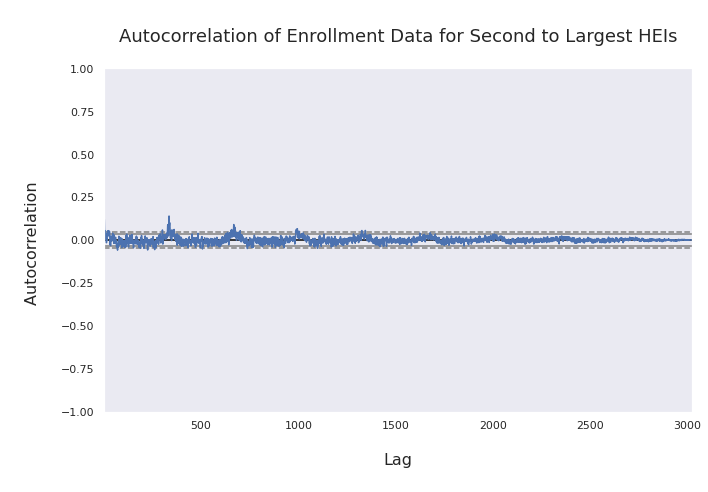

In [153]:
 
plt.figure(figsize=(10,7))
series_data = pd.Series(data = data_4['EFYTOTLT'])
autocorrelation_plot(series_data)
plt.title("\nAutocorrelation of Enrollment Data for Second to Largest HEIs\n", fontsize=18)
plt.xlabel("\nLag\n", fontsize=16)
plt.ylabel("\nAutocorrelation \n", fontsize=16)
plt.tight_layout()
plt.show()

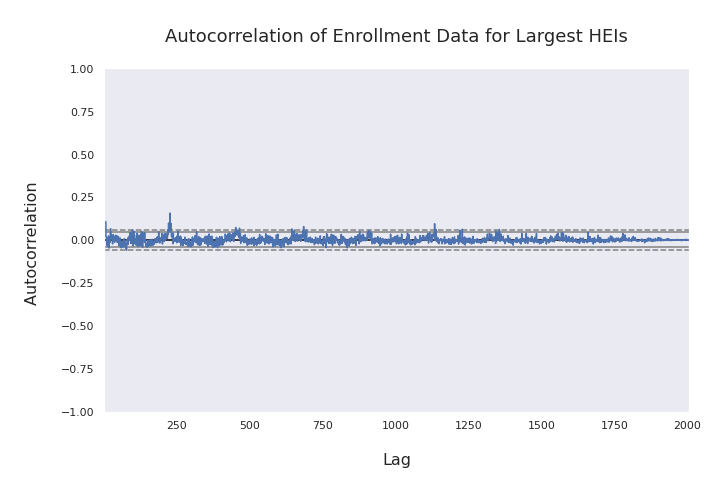

In [155]:
plt.figure(figsize=(10,7))
series_data = pd.Series(data = data_5['EFYTOTLT'])
autocorrelation_plot(series_data)
plt.title("\nAutocorrelation of Enrollment Data for Largest HEIs\n", fontsize=18)
plt.xlabel("\nLag\n", fontsize=16)
plt.ylabel("\nAutocorrelation \n", fontsize=16)
plt.tight_layout()
plt.show()

In [61]:

 
# plt.figure(figsize=(12,9))
# series_data = pd.Series(data = data_45['EFYTOTLT'])
# autocorrelation_plot(series_data)
# plt.show()

In [67]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [68]:
# https://www.statsmodels.org/stable/examples/notebooks/generated/stationarity_detrending_adf_kpss.html
def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)



In [69]:
adf_test(data_1["EFYTOTLT"])

# P value below zero - Data_1 Not correlated

Results of Dickey-Fuller Test:
Test Statistic                -1.055358e+01
p-value                        8.058963e-19
#Lags Used                     3.900000e+01
Number of Observations Used    1.176500e+04
Critical Value (1%)           -3.430906e+00
Critical Value (5%)           -2.861786e+00
Critical Value (10%)          -2.566901e+00
dtype: float64


In [71]:
adf_test(data_2["EFYTOTLT"])
# P value equal zero - Data2 Not correlated

Results of Dickey-Fuller Test:
Test Statistic                   -24.382063
p-value                            0.000000
#Lags Used                        14.000000
Number of Observations Used    12497.000000
Critical Value (1%)               -3.430873
Critical Value (5%)               -2.861771
Critical Value (10%)              -2.566893
dtype: float64


In [72]:
adf_test(data_3["EFYTOTLT"])

# P value  zero - Data_3 Not correlated

Results of Dickey-Fuller Test:
Test Statistic                -1.173616e+01
p-value                        1.306239e-21
#Lags Used                     1.600000e+01
Number of Observations Used    4.347000e+03
Critical Value (1%)           -3.431855e+00
Critical Value (5%)           -2.862205e+00
Critical Value (10%)          -2.567124e+00
dtype: float64


In [73]:
adf_test(data_4["EFYTOTLT"])

# P value  zero - Data_4 Not correlated

Results of Dickey-Fuller Test:
Test Statistic                -1.752406e+01
p-value                        4.270573e-30
#Lags Used                     6.000000e+00
Number of Observations Used    3.018000e+03
Critical Value (1%)           -3.432519e+00
Critical Value (5%)           -2.862498e+00
Critical Value (10%)          -2.567280e+00
dtype: float64


In [75]:
adf_test(data_5["EFYTOTLT"])

# P value  zero - Data_5 Not correlated

Results of Dickey-Fuller Test:
Test Statistic                -1.501712e+01
p-value                        1.035127e-27
#Lags Used                     5.000000e+00
Number of Observations Used    2.001000e+03
Critical Value (1%)           -3.433622e+00
Critical Value (5%)           -2.862985e+00
Critical Value (10%)          -2.567540e+00
dtype: float64


### The Results of Dickey-Fuller for all types of HEIs  tell us that we cannot reject the Null Hypothesis which means that  the data is correlated with its previous values

### The data regarding Student Enrollment in Institutions of size code 1 (the Smallest institutions) there appears to be some correlation between the data s the scatter plot below shows 
### In fact we are able to descern a positive trend between y(t) and y(t-1)

### The level of correlation for HEIs codes as 2nd smallest is lower as the scatter plot is more spread out 



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


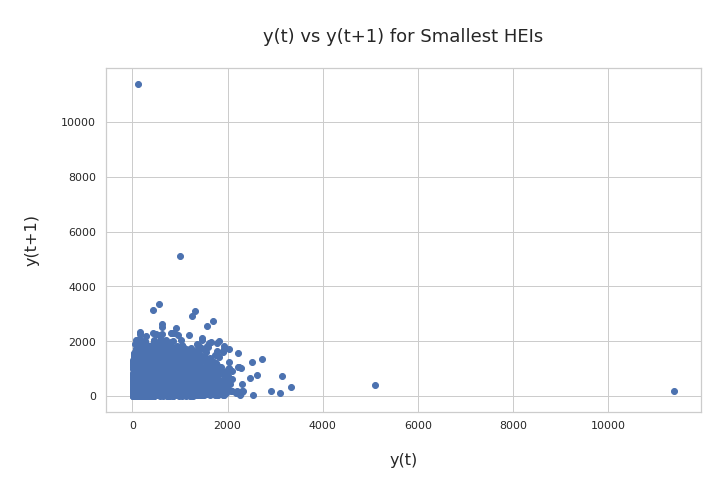

In [158]:
# https://machinelearningmastery.com/autoregression-models-time-series-forecasting-python/#:~:text=Autoregression%20is%20a%20time%20series,range%20of%20time%20series%20problems.
# https://towardsdatascience.com/detecting-stationarity-in-time-series-data-d29e0a21e638
# https://www.statology.org/dickey-fuller-test-python/
# https://machinelearningmastery.com/time-series-data-stationary-python/

from pandas.plotting import lag_plot
plt.figure(figsize=(10,7))
sns.set_style("whitegrid")
lag_plot(data_1["EFYTOTLT"])

plt.title("\ny(t) vs y(t+1) for Smallest HEIs\n", fontsize=18)
plt.xlabel("\ny(t)\n", fontsize=16)
plt.ylabel("\ny(t+1)\n", fontsize=16)
plt.tight_layout()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


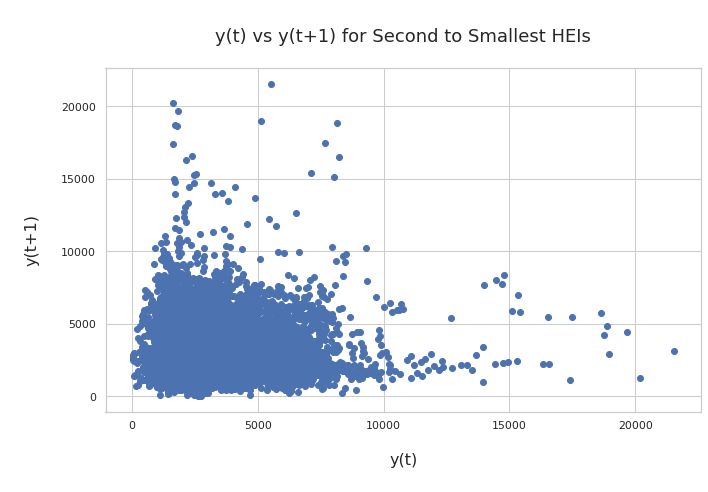

In [161]:
plt.figure(figsize=(10,7))
lag_plot(data_2["EFYTOTLT"])

plt.title("\ny(t) vs y(t+1) for Second to Smallest HEIs\n", fontsize=18)
plt.xlabel("\ny(t)\n", fontsize=16)
plt.ylabel("\ny(t+1)\n", fontsize=16)
plt.tight_layout()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


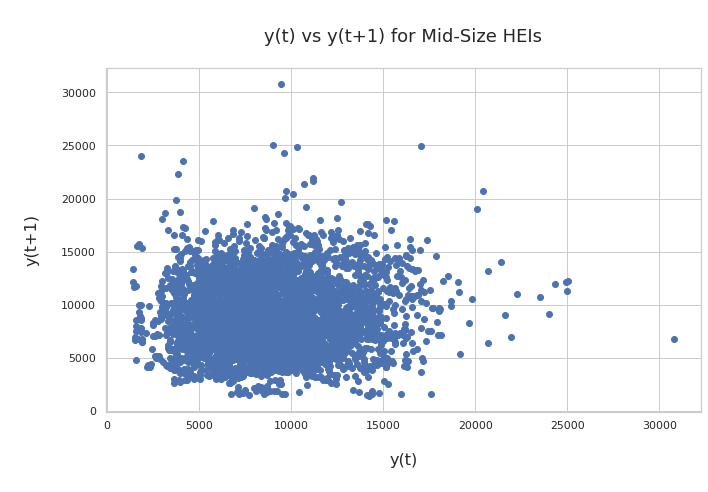

In [166]:
plt.figure(figsize=(10,7))
lag_plot(data_3["EFYTOTLT"])
plt.title("\ny(t) vs y(t+1) for Mid-Size HEIs\n", fontsize=18)
plt.xlabel("\ny(t)\n", fontsize=16)
plt.ylabel("\ny(t+1)\n", fontsize=16)
plt.tight_layout()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


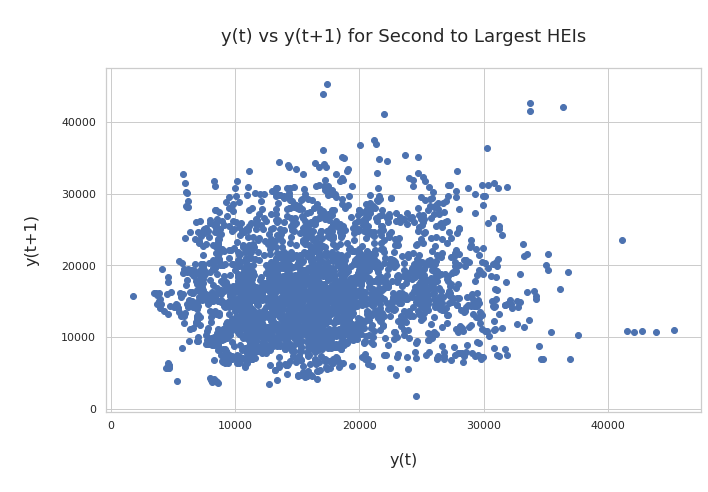

In [167]:
plt.figure(figsize=(10,7))
lag_plot(data_4["EFYTOTLT"])
plt.title("\ny(t) vs y(t+1) for Second to Largest HEIs\n", fontsize=18)
plt.xlabel("\ny(t)\n", fontsize=16)
plt.ylabel("\ny(t+1)\n", fontsize=16)
plt.tight_layout()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


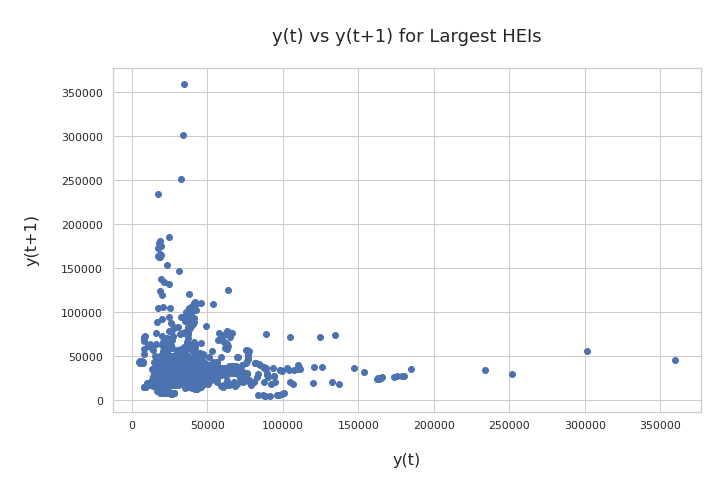

In [168]:
plt.figure(figsize=(10,7))
lag_plot(data_5["EFYTOTLT"])
plt.title("\ny(t) vs y(t+1) for Largest HEIs\n", fontsize=18)
plt.xlabel("\ny(t)\n", fontsize=16)
plt.ylabel("\ny(t+1)\n", fontsize=16)
plt.tight_layout()
plt.show()

In [81]:
# Peason's correlation between Students Enrollment Values
values = pd.DataFrame(data_1["EFYTOTLT"])
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

          t-1       t+1
t-1  1.000000  0.116835
t+1  0.116835  1.000000


In [82]:
# Peason's correlation between Students Enrollment Values
values = pd.DataFrame(data_2["EFYTOTLT"])
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

          t-1       t+1
t-1  1.000000  0.045857
t+1  0.045857  1.000000


In [83]:
# Peason's correlation between Students Enrollment Values

values = pd.DataFrame(data_3["EFYTOTLT"])
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

          t-1       t+1
t-1  1.000000  0.090685
t+1  0.090685  1.000000


In [84]:
# Peason's correlation between Students Enrollment Values
values = pd.DataFrame(data_4["EFYTOTLT"])
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

          t-1       t+1
t-1  1.000000  0.129237
t+1  0.129237  1.000000


In [85]:
# Peason's correlation between Students Enrollment Values
values = pd.DataFrame(data_5["EFYTOTLT"])
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

          t-1       t+1
t-1  1.000000  0.017147
t+1  0.017147  1.000000


In [90]:
import statsmodels.api as sm
from matplotlib import rcParams
from statsmodels.graphics import tsaplots
from statsmodels import tsa

%matplotlib inline
# import matplotlib.pyplot as plt
# import pandas as pd
import pandas_datareader as pdr
# import seaborn as sns
from statsmodels.tsa.api import acf, graphics, pacf
# from statsmodels.tsa.api import AutoReg
# from statsmodels.tsa.autoreg_model import AutoReg, ar_select_order
from statsmodels.tsa.arima_model import ARIMA

### Autocorrelation Plot 

In [87]:
data_1.set_index('YEAR', inplace=True)

In [88]:
data_1

,EFYTOTLT
YEAR,
2012-01-01,522
2012-01-01,849
2012-01-01,1127
2012-01-01,612
2012-01-01,82
...,...
2020-01-01,182
2020-01-01,192
2020-01-01,67


In [ ]:
# https://towardsdatascience.com/time-series-analysis-for-machine-learning-with-python-626bee0d0205 # SOURCE CODE FOR THE FOLLOWING TIME SERIES ANALYSIS 



In [89]:
# data_1.reset_index(inplace=True)

In [91]:
data_1

,EFYTOTLT
YEAR,
2012-01-01,522
2012-01-01,849
2012-01-01,1127
2012-01-01,612
2012-01-01,82
...,...
2020-01-01,182
2020-01-01,192
2020-01-01,67


In [92]:
# print(data_1.index)

DatetimeIndex(['2012-01-01', '2012-01-01', '2012-01-01', '2012-01-01',
               '2012-01-01', '2012-01-01', '2012-01-01', '2012-01-01',
               '2012-01-01', '2012-01-01',
               ...
               '2020-01-01', '2020-01-01', '2020-01-01', '2020-01-01',
               '2020-01-01', '2020-01-01', '2020-01-01', '2020-01-01',
               '2020-01-01', '2020-01-01'],
              dtype='datetime64[ns]', name='YEAR', length=11805, freq=None)


In [93]:
# ts = df_NUM.groupby(['YEAR','UNITID'])['EFYTOTLT'].sum().rename("students")
ts = data_1.groupby('YEAR')['EFYTOTLT'].sum().rename("students")
# ts= data_1.rename("students")
# ts = data_1[::-1]
# data_1.head()

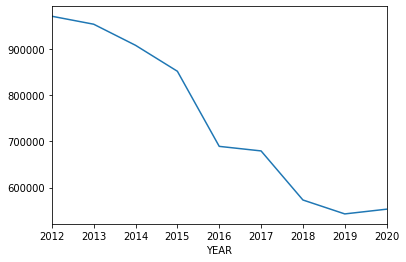

In [94]:
# (df_NUM.EFYTOTLT).plot()
ts.plot()

In [95]:
'''
Plot ts with rolling mean and 95% confidence interval with rolling std.
:parameter    
  :param ts: pandas Series    
  :param window: num - for rolling stats
  :param plot_ma: bool - whether plot moving average
  :param plot_intervals: bool - whether plot upper and lower bounds
'''
def plot_ts(ts, plot_ma=True, plot_intervals=True, window=30,
            figsize=(15,5)):    
   rolling_mean = ts.rolling(window=window).mean()    
   rolling_std = ts.rolling(window=window).std()
   plt.figure(figsize=figsize)    
   plt.title(ts.name)    
   plt.plot(ts[window:], label='Actual values', color="black")    
   if plot_ma:        
      plt.plot(rolling_mean, 'g', label='MA'+str(window),
               color="red")    
   if plot_intervals:
      lower_bound = rolling_mean - (1.96 * rolling_std)
      upper_bound = rolling_mean + (1.96 * rolling_std)
   plt.fill_between(x=ts.index, y1=lower_bound, y2=upper_bound,
                    color='lightskyblue', alpha=0.4)
   plt.legend(loc='best')
   plt.grid(True)
   plt.show()

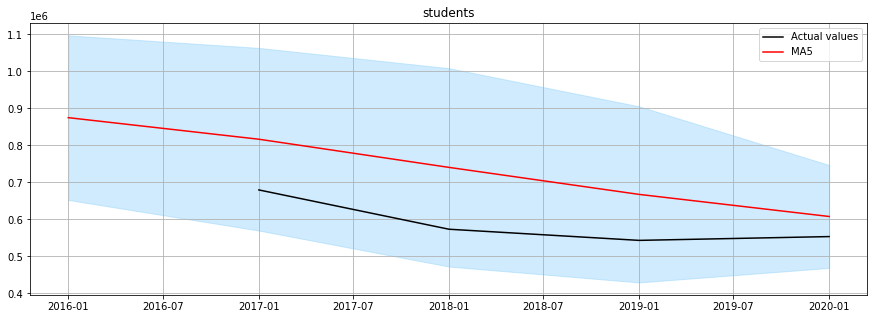

In [96]:
plot_ts(ts, window=5)

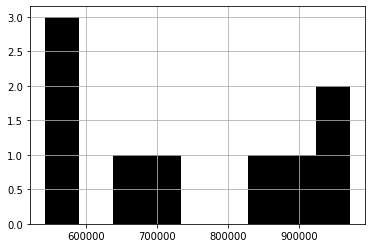

In [112]:
## Plot histogram
ts.hist(color="black", bins=9)

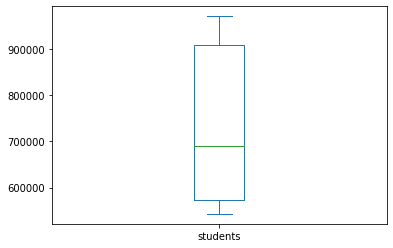

In [98]:
## Boxplot
ts.plot.box()

In [109]:
from sklearn import preprocessing
from sklearn import svm

In [110]:
'''
Find outliers using sklearn unsupervised support vetcor machine.
:parameter
    :param ts: pandas Series
    :param perc: float - percentage of outliers to look for
:return
    dtf with raw ts, outlier 1/0 (yes/no), numeric index
'''
def find_outliers(ts, perc=0.01, figsize=(15,5)):
    ## fit svm
    scaler = preprocessing.StandardScaler()
    ts_scaled = scaler.fit_transform(ts.values.reshape(-1,1))
    model = svm.OneClassSVM(nu=perc, kernel="rbf", gamma=0.01)
    model.fit(ts_scaled)
    ## dtf output
    dtf_outliers = ts.to_frame(name="ts")
    dtf_outliers["index"] = range(len(ts))
    dtf_outliers["outlier"] = model.predict(ts_scaled)
    dtf_outliers["outlier"] = dtf_outliers["outlier"].apply(lambda
                                              x: 1 if x==-1 else 0)
    ## plot
    fig, ax = plt.subplots(figsize=figsize)
    ax.set(title="Outliers detection: found"
           +str(sum(dtf_outliers["outlier"]==1)))
    ax.plot(dtf_outliers["index"], dtf_outliers["ts"],
            color="black")
    ax.scatter(x=dtf_outliers[dtf_outliers["outlier"]==1]["index"],
               y=dtf_outliers[dtf_outliers["outlier"]==1]['ts'],
               color='red')
    ax.grid(True)
    plt.show()
    return dtf_outliers

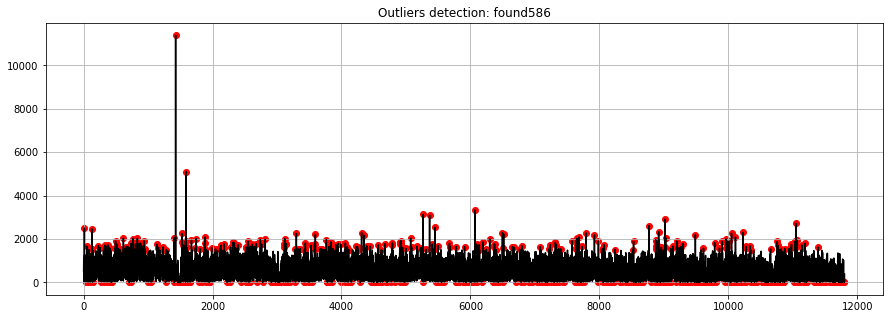

In [118]:
dtf_outliers_1 = find_outliers(data_1['EFYTOTLT'], perc=0.05)

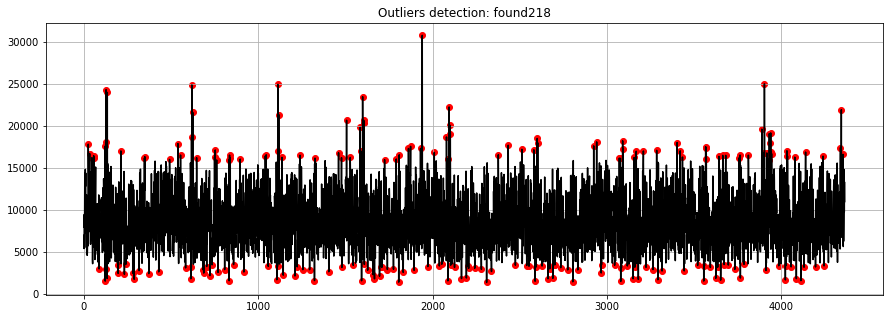

In [119]:
dtf_outliers_3 = find_outliers(data_3['EFYTOTLT'], perc=0.05)

In [120]:
'''
Interpolate outliers in a ts.
'''
def remove_outliers(ts, outliers_idx, figsize=(15,5)):
    ts_clean = ts.copy()
    ts_clean.loc[outliers_idx] = np.nan
    ts_clean = ts_clean.interpolate(method="linear")
    ax = ts.plot(figsize=figsize, color="red", alpha=0.5,
         title="Remove outliers", label="original", legend=True)
    ts_clean.plot(ax=ax, grid=True, color="black",
                  label="interpolated", legend=True)
    plt.show()
    return ts_clean

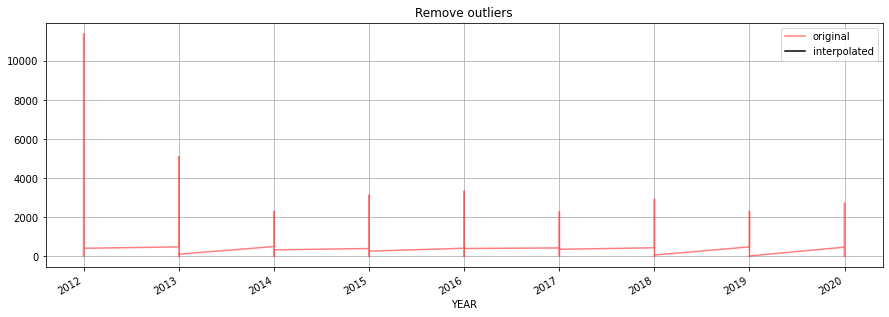

In [122]:
## outliers index position
outliers_index_pos_1 = dtf_outliers_1[dtf_outliers_1["outlier"]==1].index
## exclude outliers
ts_clean = remove_outliers(data_1.EFYTOTLT, outliers_idx=outliers_index_pos_1)

In [123]:
'''
Test stationarity by:
    - running Augmented Dickey-Fuller test wiht 95%
    - plotting mean and variance of a sample from data
    - plottig autocorrelation and partial autocorrelation
'''
def test_stationarity_acf_pacf(ts, sample=0.20, maxlag=30, figsize= 
                              (15,10)):
    with plt.style.context(style='bmh'):
        ## set figure
        fig = plt.figure(figsize=figsize)
        ts_ax = plt.subplot2grid(shape=(2,2), loc=(0,0), colspan=2)
        pacf_ax = plt.subplot2grid(shape=(2,2), loc=(1,0))
        acf_ax = plt.subplot2grid(shape=(2,2), loc=(1,1))
        
        ## plot ts with mean/std of a sample from the first x% 
        dtf_ts = ts.to_frame(name="ts")
        sample_size = int(len(ts)*sample)
        dtf_ts["mean"] = dtf_ts["ts"].head(sample_size).mean()
        dtf_ts["lower"] = dtf_ts["ts"].head(sample_size).mean() + dtf_ts["ts"].head(sample_size).std()
        dtf_ts["upper"] = dtf_ts["ts"].head(sample_size).mean() - dtf_ts["ts"].head(sample_size).std()
        dtf_ts["ts"].plot(ax=ts_ax, color="black", legend=False)
        dtf_ts["mean"].plot(ax=ts_ax, legend=False, color="red",linestyle="--", linewidth=0.7)
        ts_ax.fill_between(x=dtf_ts.index, y1=dtf_ts['lower'], y2=dtf_ts['upper'], color='lightskyblue', alpha=0.4)
        dtf_ts["mean"].head(sample_size).plot(ax=ts_ax,legend=False, color="red", linewidth=0.9)
        ts_ax.fill_between(x=dtf_ts.head(sample_size).index, y1=dtf_ts['lower'].head(sample_size), y2=dtf_ts['upper'].head(sample_size),color='lightskyblue')
        
        ## test stationarity (Augmented Dickey-Fuller)
        adfuller_test = sm.tsa.stattools.adfuller(ts, maxlag=maxlag, autolag="AIC")
        adf, p, critical_value = adfuller_test[0], adfuller_test[1], adfuller_test[4]["5%"]
        p = round(p, 3)
        conclusion = "Stationary" if p < 0.05 else "Non-Stationary"
        ts_ax.set_title('Dickey-Fuller Test 95%: '+conclusion+'(p value: '+str(p)+')')
        
        ## pacf (for AR) e acf (for MA) 
        smt.graphics.plot_pacf(ts, lags=maxlag, ax=pacf_ax, title="Partial Autocorrelation (for AR component)")
        smt.graphics.plot_acf(ts, lags=maxlag, ax=acf_ax, title="Autocorrelation (for MA component)")
        plt.tight_layout()

In [1]:
# test_stationarity_acf_pacf(data_1.EFYTOTLT, sample=0.20, maxlag=30)

In [125]:


# # 1,1,2 ARIMA Model
# model = ARIMA(df.value, order=(1,1,2))
# model_fit = model.fit(disp=0)
# print(model_fit.summary())


# 1,1,2 ARIMA Model
model1 = ARIMA(data_1.EFYTOTLT, order=(1,0,4))
model1_fit = model1.fit()
print(model1_fit.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:               EFYTOTLT   No. Observations:                11805
Model:                     ARMA(1, 4)   Log Likelihood              -87714.581
Method:                       css-mle   S.D. of innovations            408.027
Date:                Tue, 10 May 2022   AIC                         175443.162
Time:                        00:31:41   BIC                         175494.796
Sample:                             0   HQIC                        175460.496
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            567.8527     16.819     33.762      0.000     534.887     600.818
ar.L1.EFYTOTLT     0.9936      0.002    464.652      0.000       0.989       0.998
ma.L1.EFYTOTLT    -0.9141      0.009

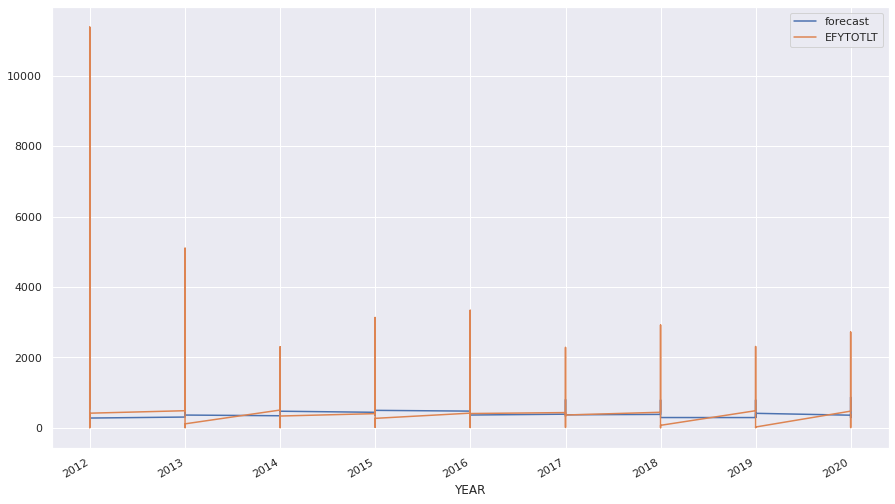

In [141]:
# Actual vs Fitted
sns.set(rc={'figure.figsize':(15,9)})
model1_fit.plot_predict(dynamic=False)
plt.show()

In [133]:
model2 = ARIMA(data_1.EFYTOTLT, order=(2,0,2))
model2_fit = model2.fit()
print(model2_fit.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:               EFYTOTLT   No. Observations:                11805
Model:                     ARMA(2, 2)   Log Likelihood              -87705.020
Method:                       css-mle   S.D. of innovations            407.695
Date:                Tue, 10 May 2022   AIC                         175422.039
Time:                        00:36:36   BIC                         175466.297
Sample:                             0   HQIC                        175436.898
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            563.1839     19.772     28.484      0.000     524.431     601.936
ar.L1.EFYTOTLT     1.7562      0.039     44.854      0.000       1.679       1.833
ar.L2.EFYTOTLT    -0.7572      0.039

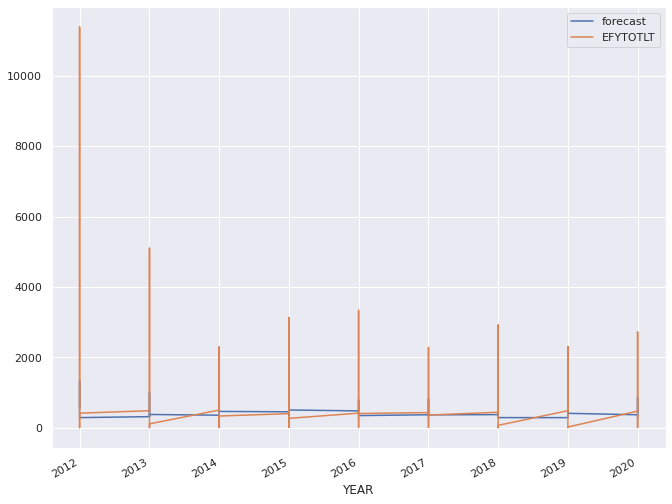

In [134]:
# Actual vs Fitted
model2_fit.plot_predict(dynamic=False)
plt.show()

In [135]:
model3 = ARIMA(data_1.EFYTOTLT, order=(4,0,4))
model3_fit = model3.fit() #disp=0
print(model3_fit.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:               EFYTOTLT   No. Observations:                11805
Model:                     ARMA(4, 4)   Log Likelihood              -87700.956
Method:                       css-mle   S.D. of innovations            407.555
Date:                Tue, 10 May 2022   AIC                         175421.912
Time:                        00:37:54   BIC                         175495.675
Sample:                             0   HQIC                        175446.676
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            561.4351     20.068     27.977      0.000     522.103     600.767
ar.L1.EFYTOTLT     1.1286      0.135      8.388      0.000       0.865       1.392
ar.L2.EFYTOTLT    -0.4326      0.176

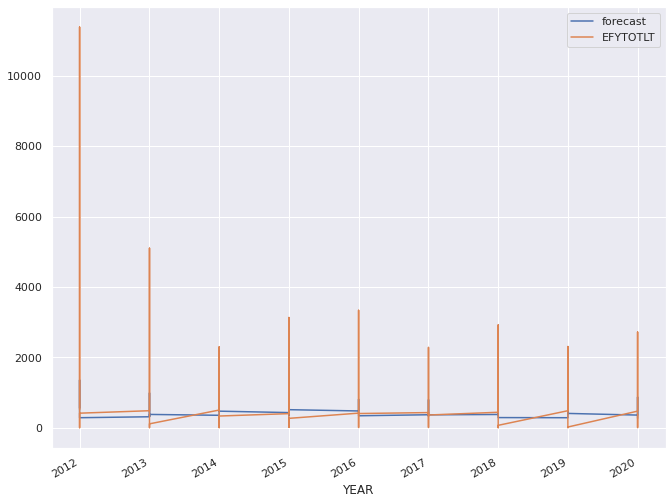

In [136]:
# Actual vs Fitted
model3_fit.plot_predict(dynamic=False)
plt.show()

In [138]:
model4 = ARIMA(data_1.EFYTOTLT, order=(4,1,4))
model4_fit = model4.fit()
# model4_fit = model4.fit(disp=0)
print(model4_fit.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:             D.EFYTOTLT   No. Observations:                11804
Model:                 ARIMA(4, 1, 4)   Log Likelihood              -87700.890
Method:                       css-mle   S.D. of innovations            407.761
Date:                Tue, 10 May 2022   AIC                         175421.780
Time:                        00:39:44   BIC                         175495.542
Sample:                             1   HQIC                        175446.543
                                                                              
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0365      0.057     -0.644      0.520      -0.147       0.075
ar.L1.D.EFYTOTLT     0.5049      0.242      2.086      0.037       0.031       0.979
ar.L2.D.EFYTOTLT    -0.4575 

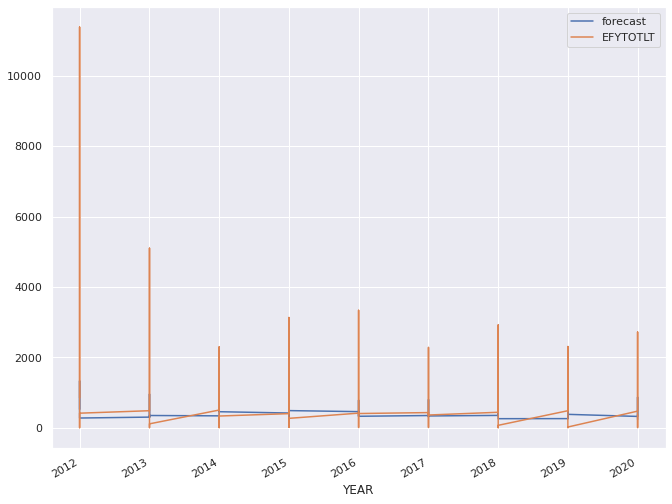

In [139]:
# Actual vs Fitted
model4_fit.plot_predict(dynamic=False)
plt.show()

In [140]:
model5 = ARIMA(data_1.EFYTOTLT, order=(5,1,5))
model5_fit = model5.fit(disp=0)
print(model5_fit.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:             D.EFYTOTLT   No. Observations:                11804
Model:                 ARIMA(5, 1, 5)   Log Likelihood              -87694.077
Method:                       css-mle   S.D. of innovations            407.524
Date:                Tue, 10 May 2022   AIC                         175412.155
Time:                        00:42:58   BIC                         175500.669
Sample:                             1   HQIC                        175441.871
                                                                              
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0364      0.056     -0.649      0.516      -0.146       0.074
ar.L1.D.EFYTOTLT     0.6075      0.362      1.677      0.094      -0.102       1.317
ar.L2.D.EFYTOTLT    -0.7042 

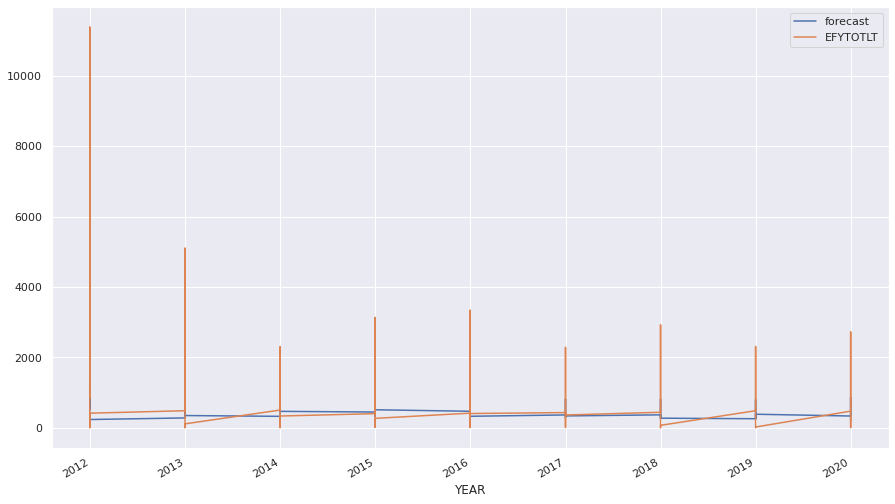

In [142]:
# Actual vs Fitted
model5_fit.plot_predict(dynamic=False)
plt.show()

In [131]:
# # from statsmodels.tsa.arima_model import ARIMA
# # import pmdarima as pm

# # 

# model = pm.auto_arima(data_1.EFYTOTLT, start_p=1, start_q=1,
#                       test='adf',       # use adftest to find optimal 'd'
#                       max_p=3, max_q=3, # maximum p and q
#                       m=1,              # frequency of series
#                       d=None,           # let model determine 'd'
#                       seasonal=False,   # No Seasonality
#                       start_P=0, 
#                       D=0, 
#                       trace=True,
#                       error_action='ignore',  
#                       suppress_warnings=True, 
#                       stepwise=True)

# print(model.summary())

In [143]:
# # statsmodels.tsa.arima.model.ARIMA
# from statsmodels.tsa.arima.model import ARIMA
# model_best = ARIMA(data_1.EFYTOTLT, order=(2,0,2))
# model_best_fit = model_best.fit()
# print(model_best_fit.summary())